In [1]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import time
import matplotlib.pyplot as plt


## determining whether a given Boolean function is constant or balanced, but done classically.

In [3]:
def con(b):
    if len(b) >= 0:
        return 0
    else:
        return 0
def bal(b):
    return int(b[0])
def constantbalanced(function, numberofbits):
    counter = []
    i = 0
    while i < (2**numberofbits):
        b = bin(i)[2:].zfill(numberofbits)
        res = function(b)
        if res not in counter:
            counter.append(res)
        if len(counter) > 1:
            return "Balanced"
        i += 1
    return "Constant"
    

In [4]:
start_time = time.perf_counter()
print("Test 1 =>", constantbalanced(con, 3))
print("Test 2 =>", constantbalanced(bal, 3))
end_time = time.perf_counter()
print(f"Execution Time: {end_time - start_time:.8f} seconds")

Test 1 => Constant
Test 2 => Balanced
Execution Time: 0.00026140 seconds


## Classical linear search

In [6]:
def linear_search(numbers, val):
    i = 0
    l=len(numbers)
    while True:
        if i >= l:
           break
        if numbers[i] == val:
            return i
        i =i+ 1
    return -1

In [8]:
numbers = ['4', '7', '2','1','5','6','8','3','9','10','16','12','13','14','17','18','20','19','30','29','27','28','26','25','23','24','22','31','21' '11']
val = '11'
start_time = time.perf_counter()
res = linear_search(numbers, val)
end_time = time.perf_counter()
print(f'index: {res}')
print(f"Execution Time: {end_time - start_time:.17f} seconds")

index: -1
Execution Time: 0.00006520003080368 seconds


## Grover’s Algorithm

In [14]:
#for 2-Qubit Case 

def apply_virtual_x(qc, qubit):
    qc.h(qubit)
    qc.z(qubit)
    qc.h(qubit)

def oracle_general(qc, marked_index):
    binary = f"{marked_index:02b}"
    flipped = []

    for i, bit in enumerate(binary):
        if bit == '0':
            apply_virtual_x(qc, i)
            flipped.append(i)

    qc.cz(0, 1)

    for i in flipped:
        apply_virtual_x(qc, i)

def Us_operator(qc):
    qc.h([0, 1])
    qc.z([0, 1])
    qc.cz(0, 1)
    qc.h([0, 1])

def grover_2qubit_general(marked_index):
    qc = QuantumCircuit(2, 2)
    qc.h([0, 1])
    oracle_general(qc, marked_index)
    Us_operator(qc)
    qc.measure([0, 1], [0, 1])
    return qc

# General Grover’s Algorithm (3+ Qubits) 

def grover_search(n, marked_index):
    if n == 2:
        return grover_2qubit_general(marked_index)

    iterations = int(np.floor(np.pi / 4 * np.sqrt(2 ** n)))
    qc = QuantumCircuit(n, n)
    qc.h(range(n))

    for _ in range(iterations):
        oracle(qc, n, marked_index)
        Us(qc, n)

    qc.measure(range(n), range(n))
    return qc

def oracle(qc, n, marked_index):
    binary = format(marked_index, f'0{n}b')
    for i in range(n):
        if binary[i] == '0':
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    for i in range(n):
        if binary[i] == '0':
            qc.x(i)

def Us(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))


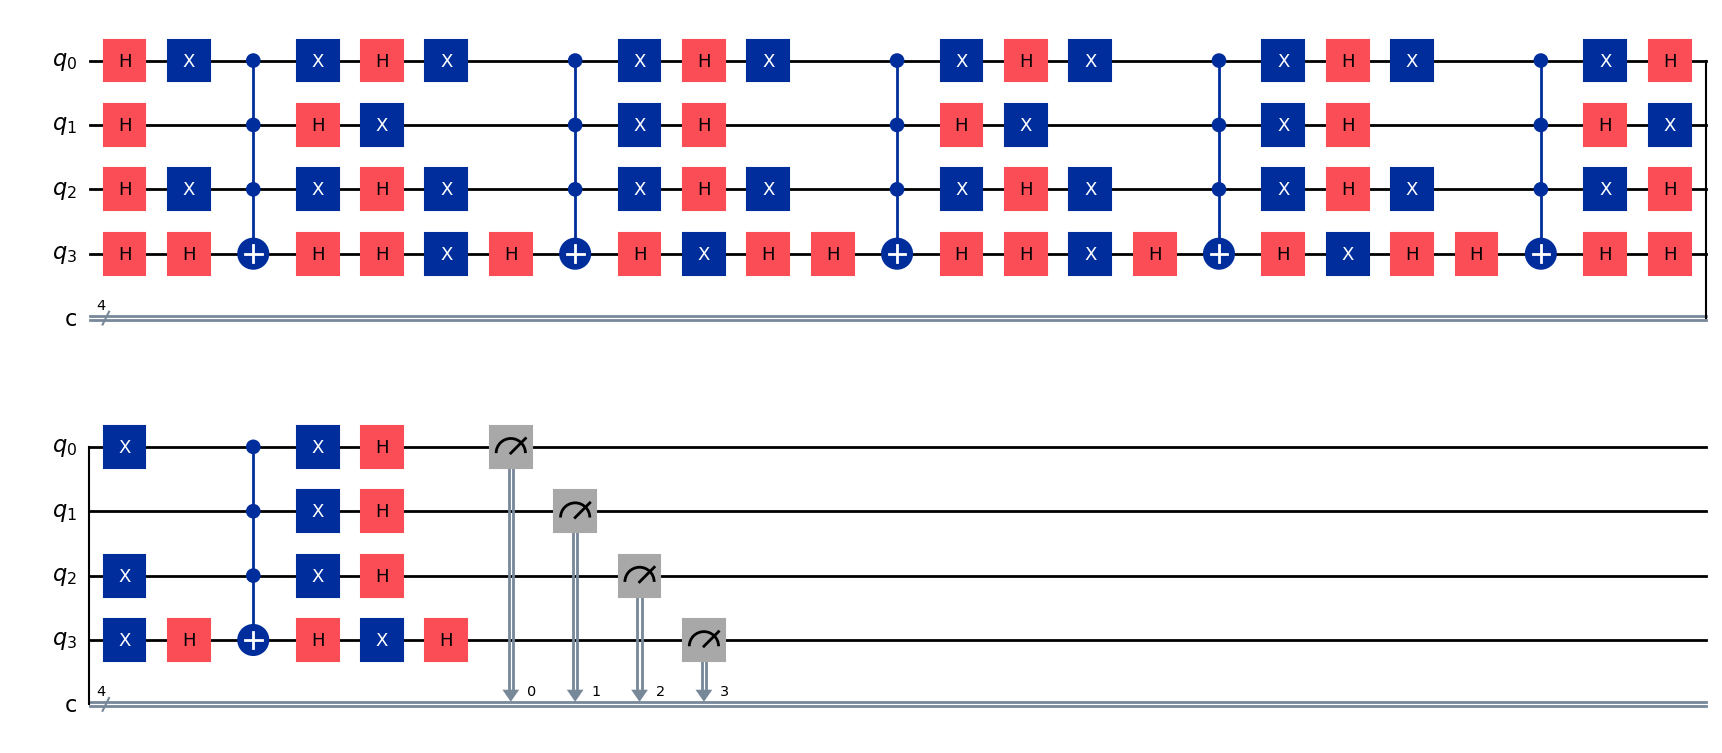

In [16]:
qc = grover_search(4, marked_index=5)
qc.draw('mpl')

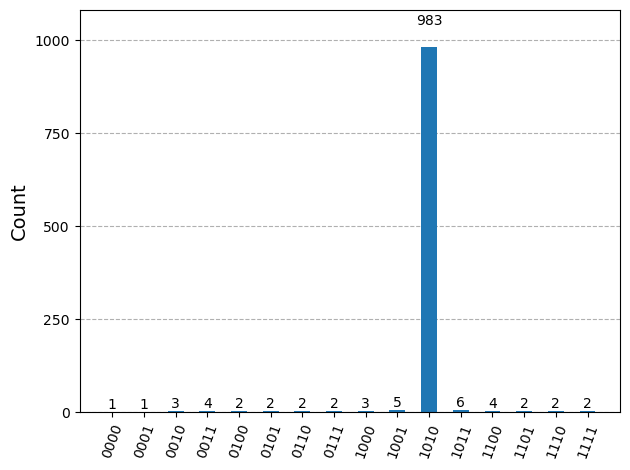

In [17]:
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

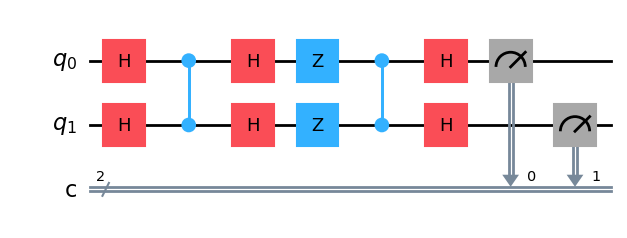

In [18]:
qc = grover_search(2, 3)
qc.draw('mpl')

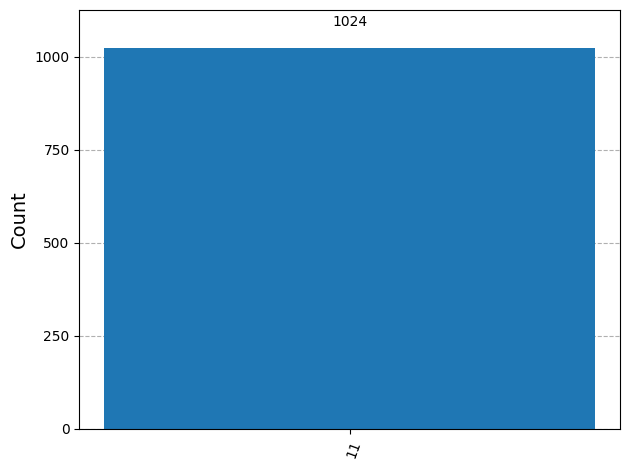

In [12]:
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)


In [13]:
start_time = time.perf_counter()
qc = grover_search(5, 11)
end_time = time.perf_counter()

print(f'index: {res}')
print(f"Execution Time: {end_time - start_time:.17f} seconds")

index: -1
Execution Time: 0.00518950028344989 seconds


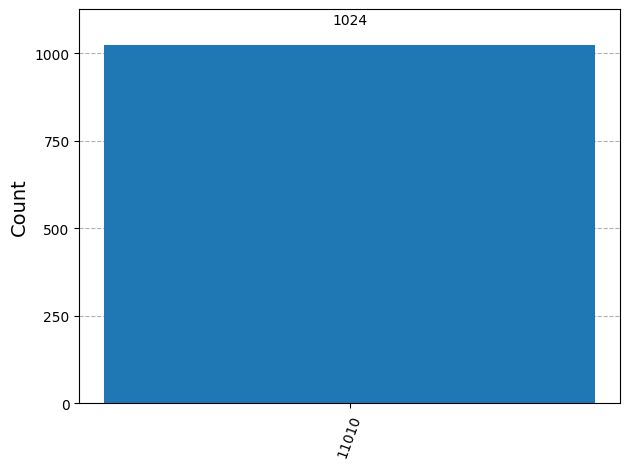

In [14]:
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)


## Deutsch's algorithm

In [15]:
def initialize_circuit_var(n,m):
  q = QuantumRegister(m,'q')
  m = ClassicalRegister(n,'c')
  c = QuantumCircuit(q,m)
  return q,m,c

In [16]:
def simulate_circuit(circuit):
  aer = AerSimulator()
  res = aer.run(circuit,shots = 1024).result()
  counts = res.get_counts()
  return plot_histogram(counts)

In [17]:
def Deutsch_algorithm(n):
  '''
    This function takes n which represents the number of bits taken for input x
    so when using it, we gonna to add a bit for output y
    it print the circuit after applying its operations and returns the circuit itself
  '''

  # initializing the circuit and its components: quibts and classical measurement
  quibt,measure ,circuit =initialize_circuit_var(n,n+1)

  # 1. apply not gate on y
  circuit.x(quibt[n])

  circuit.barrier()

  # 2. apply hadmard gate for all of the bits (n+1)
  for i in range(n+1):
    circuit.h(quibt[i])

  # 3. adding lines
  circuit.barrier()

  # 4. apply Uf function (cnot gate)
  for i in range(n):
    circuit.cx(quibt[i],quibt[n])
  circuit.barrier()

  # 5. apply hadmard gate on x
  # 6. measure the output
  for i in range(n):
    circuit.h(quibt[i])

  circuit.barrier()
  for i in range(n):
    circuit.measure(quibt[i],measure[i])
  """  for i in range(n):
    circuit.measure(quibt[i],measure[i])"""
  return circuit

In [21]:
# initilizing a dictionary to store the algorithms and their time
time_dict = {}

In [23]:
### using of Deutsch Joza Algorithm
n_bits = int(input("Please enter the number of bits you want to apply Deutsch Joza algorithm:"))

st = time.perf_counter()
deut_cir = Deutsch_algorithm(n_bits)
en = time.perf_counter()
deutsch_time = en - st
time_dict["Deutsch Joza"] = deutsch_time
print(deutsch_time)

Please enter the number of bits you want to apply Deutsch Joza algorithm: 3


0.0009417999535799026


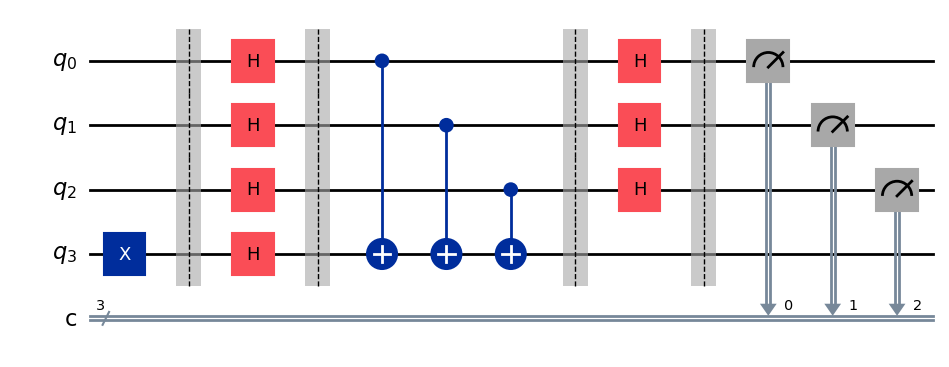

In [24]:
deut_cir.draw('mpl')

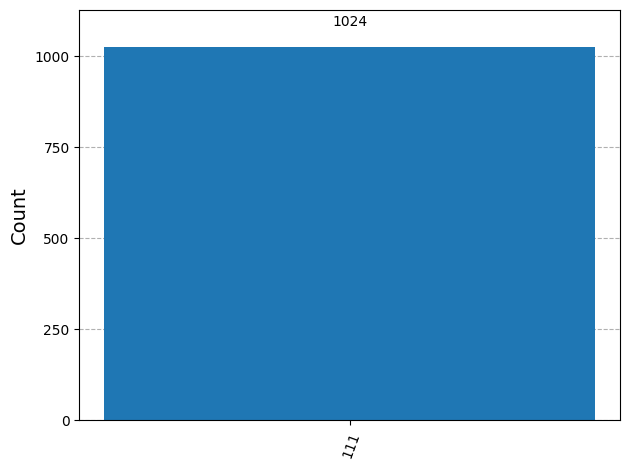

In [25]:
simulate_circuit(deut_cir)